In [142]:
from sklearn.cluster import KMeans

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import copy
from math import ceil

In [143]:
df = pd.read_csv('tour_package.csv')
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [144]:
df.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


In [145]:
df.drop(['CustomerID'],axis='columns', inplace=True)

In [146]:
df.Age = df.Age.fillna(df.Age.mean())
df.DurationOfPitch = df.DurationOfPitch.fillna(df.DurationOfPitch.mean())
df.NumberOfFollowups = df.NumberOfFollowups.fillna(ceil(df.NumberOfFollowups.mean()))
df.PreferredPropertyStar = df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mean())
df.NumberOfTrips = df.NumberOfTrips.fillna(ceil(df.NumberOfTrips.mean()))
df.NumberOfChildrenVisiting = df.NumberOfChildrenVisiting.fillna(ceil(df.NumberOfChildrenVisiting.mean()))
df.MonthlyIncome = df.MonthlyIncome.fillna(df.MonthlyIncome.mean())


In [147]:
df.TypeofContact = df.TypeofContact.map({'Self Enquiry':0, 'Company Invited':1})
df.Occupation = df.Occupation.map({'Salaried':0, 'Free Lancer':1, 'Small Business':2, 'Large Business':3})
df.Gender = df.Gender.map({'Female':0, 'Male':1, 'Fe Male':2})
df.ProductPitched = df.ProductPitched.map({'Deluxe':0, 'Basic':1, 'Standard':2, 'Super Deluxe':3, 'King':4})
df.MaritalStatus = df.MaritalStatus.map({'Single':0, 'Divorced':1, 'Married':2, 'Unmarried':3})
df.Designation = df.Designation.map({'Manager':0, 'Executive':1, 'Senior Manager':2, 'AVP':3, 'VP':4})

In [148]:
df.describe()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
count,4888.000000,4888.000000,4863.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000
mean,0.188216,37.622265,0.291795,1.654255,15.490835,1.119476,0.659984,2.905074,3.711129,1.078560,3.581037,1.570376,3.258388,0.290917,3.078151,0.620295,1.198241,1.078560,23619.853491
std,0.390925,9.098418,0.454635,0.916583,8.297971,1.118901,0.536549,0.724891,0.998271,1.097072,0.795883,0.948197,1.826787,0.454232,1.365792,0.485363,0.857197,1.097072,5250.862747
min,0.000000,18.000000,0.000000,1.000000,5.000000,0.000000,0.000000,1.000000,1.000000,0.000000,3.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1000.000000
25%,0.000000,31.000000,0.000000,1.000000,9.000000,0.000000,0.000000,2.000000,3.000000,0.000000,3.000000,1.000000,2.000000,0.000000,2.000000,0.000000,1.000000,0.000000,20485.000000
50%,0.000000,37.000000,0.000000,1.000000,14.000000,2.000000,1.000000,3.000000,4.000000,1.000000,3.000000,2.000000,3.000000,0.000000,3.000000,1.000000,1.000000,1.000000,22655.000000
75%,0.000000,43.000000,1.000000,3.000000,19.000000,2.000000,1.000000,3.000000,4.000000,2.000000,4.000000,2.000000,4.000000,1.000000,4.000000,1.000000,2.000000,2.000000,25424.750000
max,1.000000,61.000000,1.000000,3.000000,127.000000,3.000000,2.000000,5.000000,6.000000,4.000000,5.000000,3.000000,22.000000,1.000000,5.000000,1.000000,3.000000,4.000000,98678.000000


In [149]:
df.TypeofContact = df.TypeofContact.fillna(ceil(df.TypeofContact.mean()))

In [150]:
df.describe()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
count,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000
mean,0.188216,37.622265,0.295417,1.654255,15.490835,1.119476,0.659984,2.905074,3.711129,1.078560,3.581037,1.570376,3.258388,0.290917,3.078151,0.620295,1.198241,1.078560,23619.853491
std,0.390925,9.098418,0.456277,0.916583,8.297971,1.118901,0.536549,0.724891,0.998271,1.097072,0.795883,0.948197,1.826787,0.454232,1.365792,0.485363,0.857197,1.097072,5250.862747
min,0.000000,18.000000,0.000000,1.000000,5.000000,0.000000,0.000000,1.000000,1.000000,0.000000,3.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1000.000000
25%,0.000000,31.000000,0.000000,1.000000,9.000000,0.000000,0.000000,2.000000,3.000000,0.000000,3.000000,1.000000,2.000000,0.000000,2.000000,0.000000,1.000000,0.000000,20485.000000
50%,0.000000,37.000000,0.000000,1.000000,14.000000,2.000000,1.000000,3.000000,4.000000,1.000000,3.000000,2.000000,3.000000,0.000000,3.000000,1.000000,1.000000,1.000000,22655.000000
75%,0.000000,43.000000,1.000000,3.000000,19.000000,2.000000,1.000000,3.000000,4.000000,2.000000,4.000000,2.000000,4.000000,1.000000,4.000000,1.000000,2.000000,2.000000,25424.750000
max,1.000000,61.000000,1.000000,3.000000,127.000000,3.000000,2.000000,5.000000,6.000000,4.000000,5.000000,3.000000,22.000000,1.000000,5.000000,1.000000,3.000000,4.000000,98678.000000


In [151]:
# Nos quedamos con Age, NumberOfTrips y MonthlyIncome

df_sub = df.drop(['ProdTaken', 'TypeofContact', 'CityTier', 'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',	
                  'ProductPitched',	'PreferredPropertyStar', 'MaritalStatus', 'Passport', 'PitchSatisfactionScore', 'OwnCar',	
                  'NumberOfChildrenVisiting', 'Designation',], axis='columns')
df_sub.head(10)



,Age,NumberOfTrips,MonthlyIncome
0,41.000000,1.0,20993.0
1,49.000000,2.0,20130.0
2,37.000000,7.0,17090.0
3,33.000000,2.0,17909.0
4,37.622265,1.0,18468.0
5,32.000000,1.0,18068.0
6,59.000000,5.0,17670.0
7,30.000000,2.0,17693.0
8,38.000000,1.0,24526.0
9,36.000000,7.0,20237.0


In [152]:
centers = range(1, 9)
clusters = [KMeans(n_clusters=center) for center in centers]

In [153]:
scores = [model.fit(df_sub).score(df_sub) for model in clusters]

c:\Users\75890424\Documents\Universidad NUR\5to Semestre\Algoritmica\k_means\env_kmeans\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\75890424\Documents\Universidad NUR\5to Semestre\Algoritmica\k_means\env_kmeans\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\75890424\Documents\Universidad NUR\5to Semestre\Algoritmica\k_means\env_kmeans\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\75890424\Documents\Universidad NUR\5to Semestre\Algoritmica\k_means\env_kmeans\Lib\site-packag

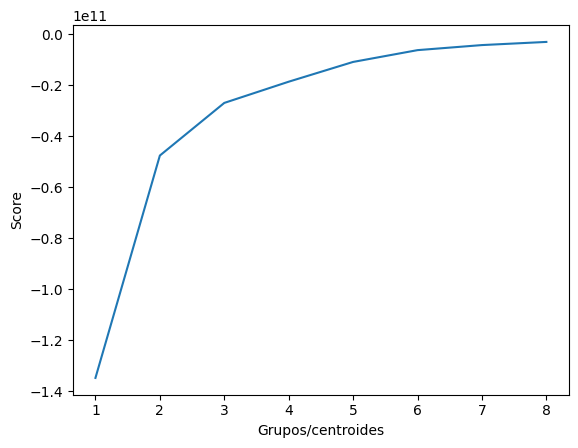

In [154]:
plt.plot(centers, scores)
plt.xlabel('Grupos/centroides')
plt.ylabel('Score')
plt.show()

In [155]:
k_means = KMeans(n_clusters=5)

In [156]:
k_means.fit(df_sub)

c:\Users\75890424\Documents\Universidad NUR\5to Semestre\Algoritmica\k_means\env_kmeans\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [157]:
k_means.cluster_centers_
# datos en notacion cientifica

array([[3.60607444e+01, 3.31480677e+00, 2.22323425e+04],
       [4.72998205e+01, 3.69658887e+00, 3.44524022e+04],
       [3.34526224e+01, 2.64325323e+00, 1.80512033e+04],
       [4.05031780e+01, 3.57097458e+00, 2.68407744e+04],
       [3.65000000e+01, 1.50000000e+00, 9.68390000e+04]])

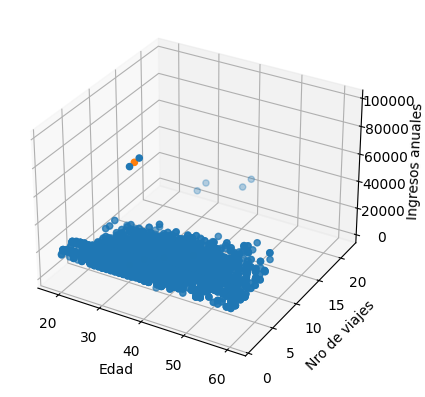

In [158]:
# Asumo que el grafico se visualiza a si ya que hay mucha diferencia entre el rago de valores de las columas selecionadas
# Age va entre 20-50 
# NumberOfTrips entre 1 a 7
# MonthlyIncome 12k a 96k
df_array = df_sub.to_numpy()
figure = plt.figure()
axis = figure.add_subplot(111, projection='3d')
chart = axis.scatter(df_array[:, 0], df_array[:, 1], df_array[:, 2])
centroids = axis.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], k_means.cluster_centers_[:, 2])
axis.set_xlabel('Edad')
axis.set_ylabel('Nro de viajes')
axis.set_zlabel('Ingresos anuales')
plt.show()

In [159]:
groups = [
    'Viajero Turista',                   #(Salario medio-bajo y viaja mucho) Tienen al rededor de 26 años, viaja en promedio 3 veces al año y gana anualmente 22k               
    'Viajero Concurrente',               #(Salario medio-alto y viaja mucho)Tienen al rededor de 47 años, viaja en promedio 4 veces al año y gana anualmente 34k 
    'Viajero Promedio',                  #(Salario medio y viaja mucho) Tienen al rededor de 40 años, viaja en promedio 3-4 veces al año y gana anualmente 26k 
    'Viajero Reservado',                 #(Salario alto y viaja poco)Tienen al rededor de 36 años, viaja en promedio 1-2 veces al año y gana anualmente 96k 
    'Viajero Audaz'                      #(Salario bajo y viaja normalmente) Tienen al rededor de 33 años, viaja en promedio 2-3 veces al año y gana anualmente 18k 
]

In [168]:
age = 23
income_monthly= 22000
travels_annual = 3
predicted = k_means.predict([[age, travels_annual, income_monthly]])

print(f'El viajero de {age} años, viajando {travels_annual} veces al año y con un ingreso mensual de {income_monthly} es un viajero {groups[predicted[0]]}')

El viajero de 23 años, viajando 3 veces al año y con un ingreso mensual de 22000 es un viajero Viajero Turista


c:\Users\75890424\Documents\Universidad NUR\5to Semestre\Algoritmica\k_means\env_kmeans\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
